In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_data = pd.read_csv(r"C:\Users\nivvi\Downloads\application_data.csv\application_data.csv")  # change the file path
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_data.drop(['APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 
'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 
'EMERGENCYSTATE_MODE', 'OWN_CAR_AGE', 'EXT_SOURCE_1'], axis = 1, inplace=True)

In [4]:
app_data1 = app_data.dropna(axis = 0)

In [5]:
app_data1.shape

(167732, 73)

In [6]:
previous_app = pd.read_csv(r"C:\Users\nivvi\Downloads\previous_application.csv\previous_application.csv")
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
previous_app.shape

(1670214, 37)

In [8]:
previous_app.drop(['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION' ,'DAYS_LAST_DUE', 
                   'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_TYPE_SUITE', 'RATE_INTEREST_PRIMARY', 
                   'RATE_DOWN_PAYMENT' ,'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT'], axis = 1, inplace=True)

In [11]:
previous_app1 = previous_app.dropna(axis = 1)
previous_app1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [12]:
df = app_data1.merge(previous_app1, on='SK_ID_CURR', how='inner')

In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,110,Consumer electronics,low_normal
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,50,Connectivity,low_normal


In [13]:
df.shape

(788066, 93)

In [15]:
df.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
NAME_PRODUCT_TYPE       0
CHANNEL_TYPE            0
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
NAME_YIELD_GROUP        0
Length: 93, dtype: int64

In [18]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DE

In [14]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    783376
1.0      4503
2.0       164
3.0        19
4.0         4
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [15]:
final_df = df.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','SK_ID_CURR','CODE_GENDER',
       'FLAG_OWN_CAR', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'DAYS_ID_PUBLISH', 'REGION_POPULATION_RELATIVE', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'], axis = 1)

In [16]:
final_df.head()

,TARGET,NAME_CONTRACT_TYPE_x,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,1,Cash loans,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,...,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal
1,0,Revolving loans,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,...,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle
2,0,Cash loans,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,...,-370,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal
3,0,Cash loans,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,...,-82,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA
4,0,Cash loans,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,...,-2536,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,Connectivity,low_normal


In [17]:
final_df.shape

(788066, 49)

In [18]:
final_df['TARGET'].value_counts() / len(df) * 100

0    90.747983
1     9.252017
Name: TARGET, dtype: float64

In [58]:
final_df.select_dtypes(include = 'object')

,NAME_CONTRACT_TYPE_x,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,Cash loans,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Consumer loans,...,Approved,XNA,XAP,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal
1,Revolving loans,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,Consumer loans,...,Approved,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle
2,Cash loans,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,Other,Consumer loans,...,Approved,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal
3,Cash loans,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,Other,Cash loans,...,Canceled,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA
4,Cash loans,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,Other,Consumer loans,...,Approved,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,Connectivity,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788061,Cash loans,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,...,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle
788062,Cash loans,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Revolving loans,...,Refused,XNA,HC,Repeater,XNA,Cards,walk-in,Country-wide,Connectivity,XNA
788063,Cash loans,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,...,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,low_normal
788064,Cash loans,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,...,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal


C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\n

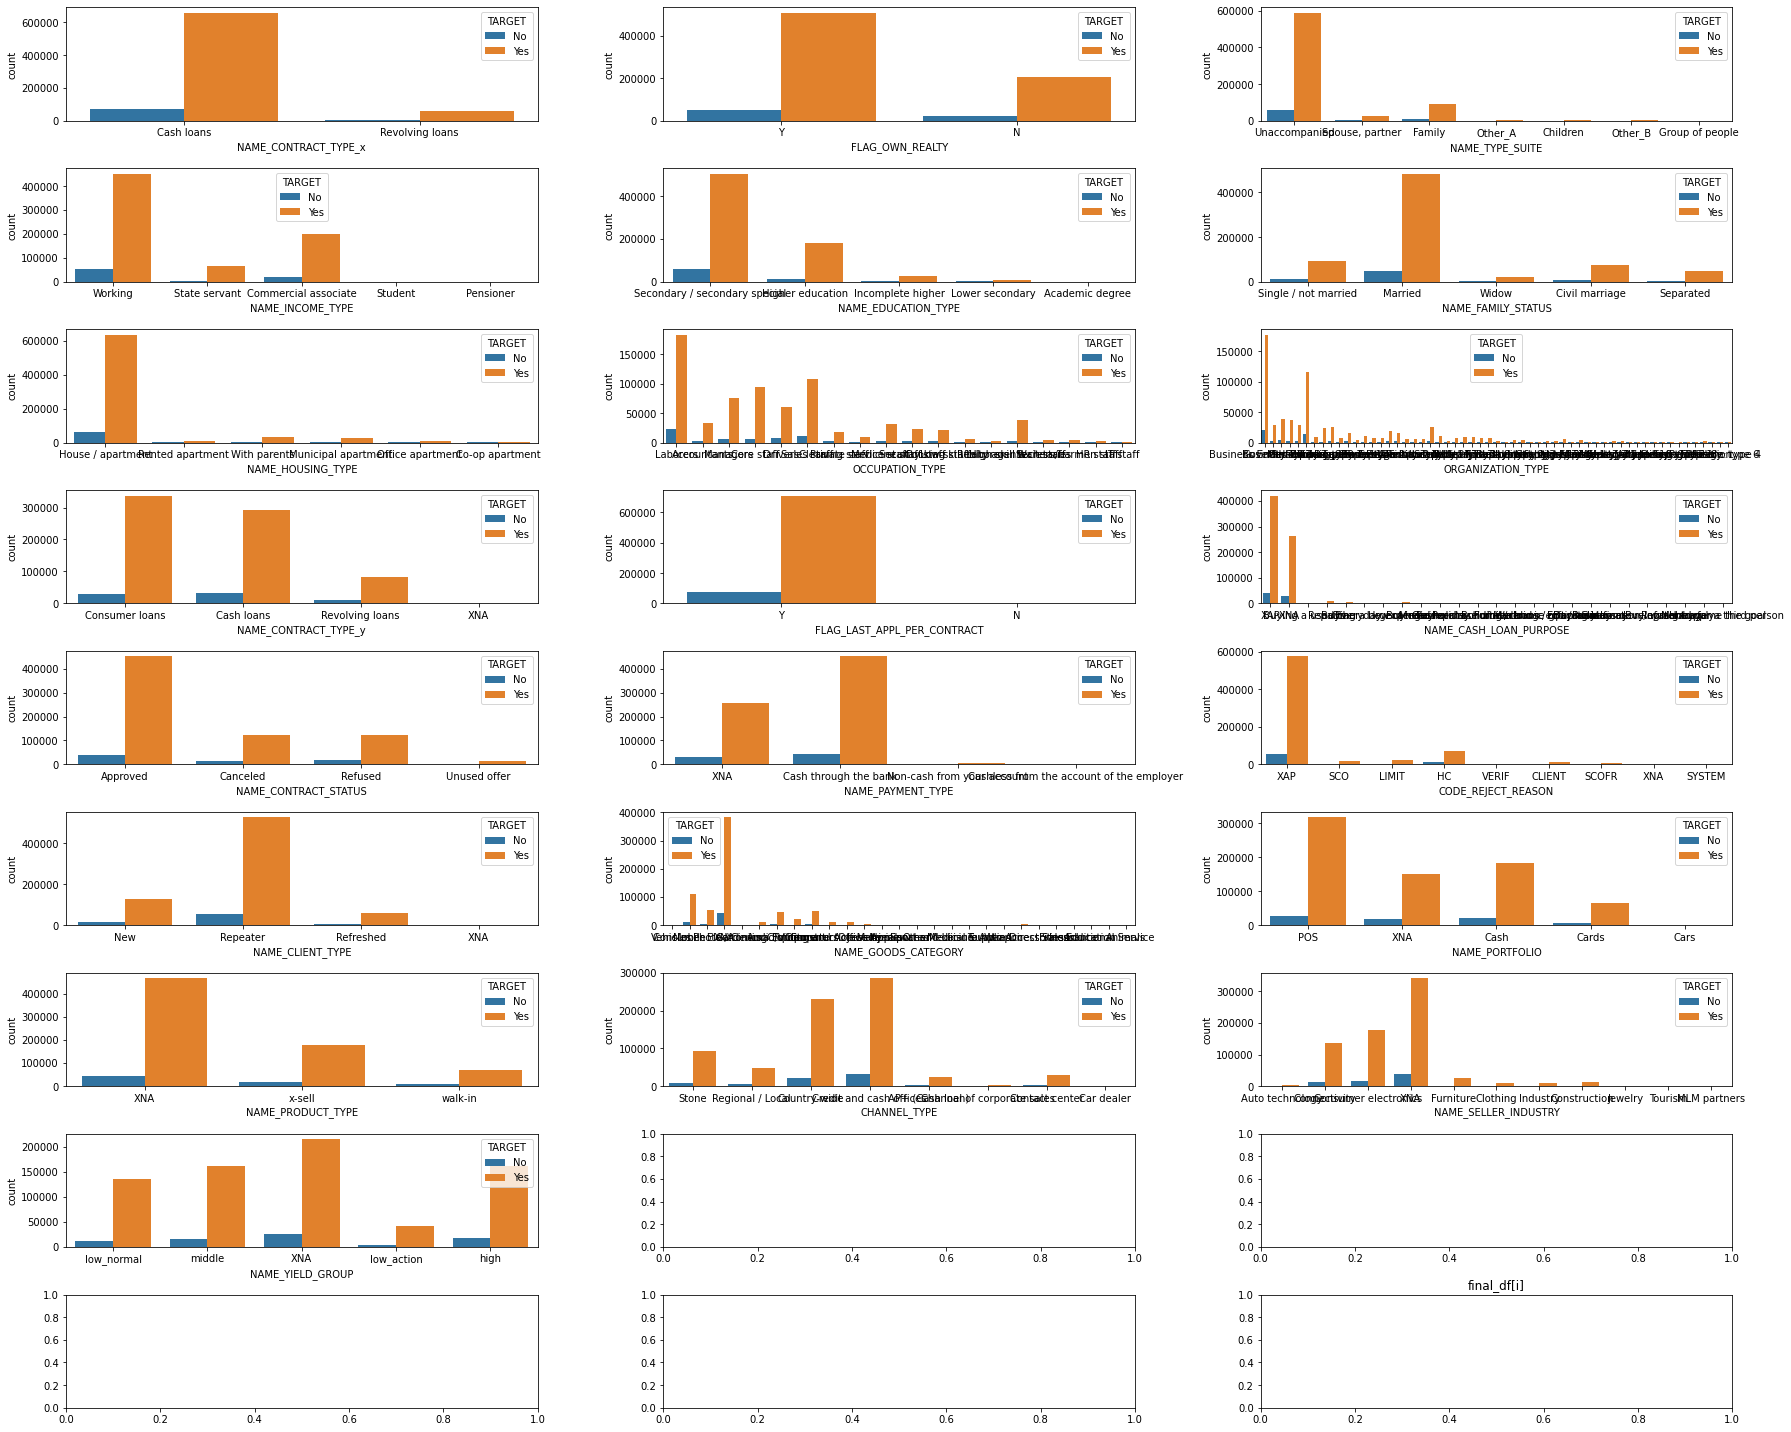

In [118]:
fig, ax= plt.subplots(nrows= 9,ncols = 3, figsize=(25,20))

for i, subplot in zip(final_df.select_dtypes(include = 'object'), ax.flatten()):
    sns.countplot(final_df[i], hue = final_df['TARGET'].replace({1: 'No', 0: 'Yes'}), ax=subplot)
    plt.title('final_df[i]')

plt.tight_layout()
plt.show()

In [62]:
import seaborn as sns

C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

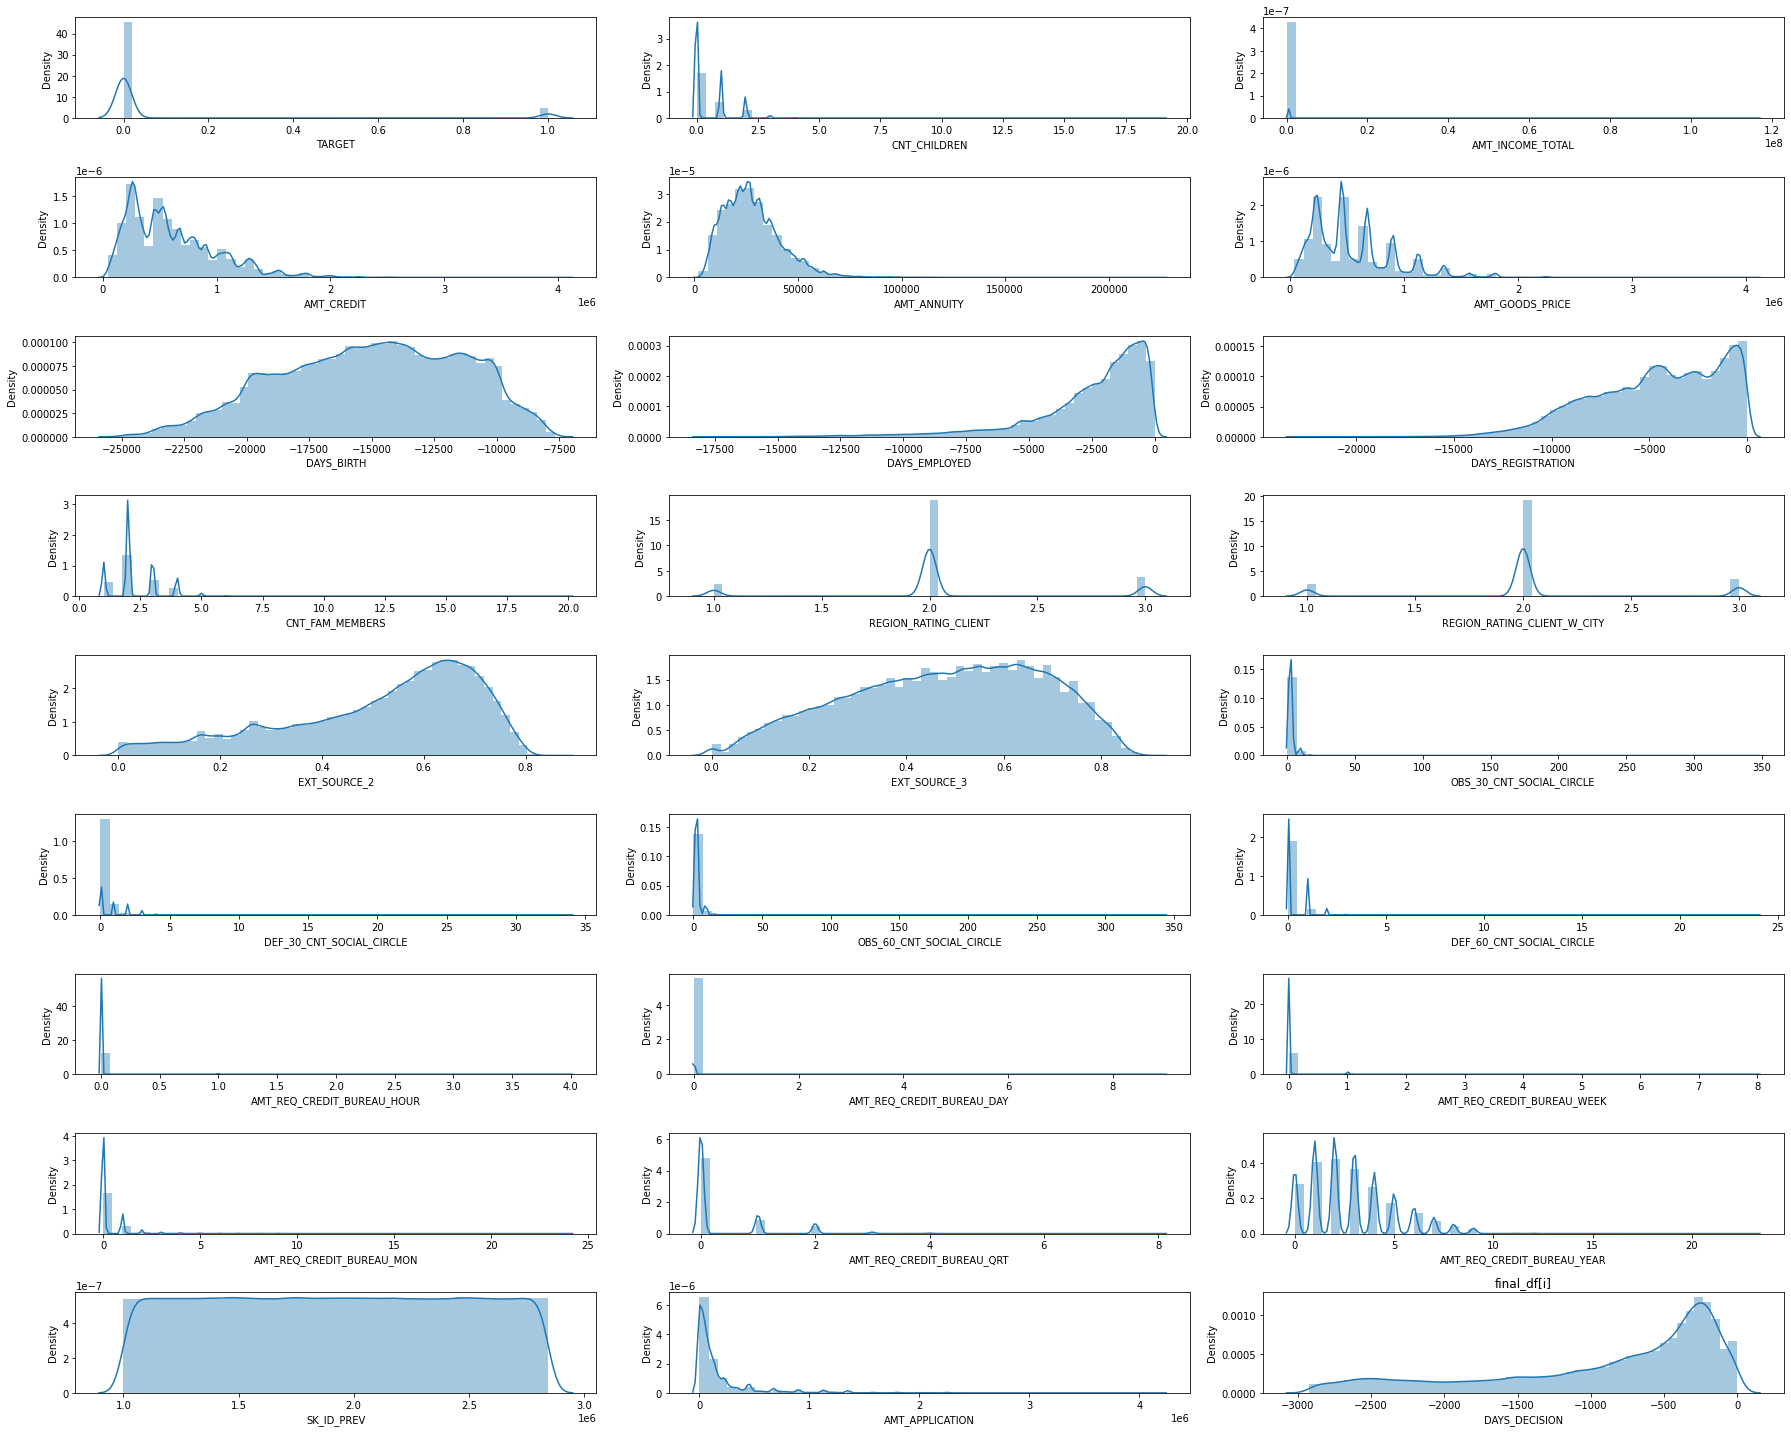

In [64]:
fig, ax= plt.subplots(nrows= 9,ncols = 3, figsize=(25,20))

for i, subplot in zip(final_df.select_dtypes(include = np.number), ax.flatten()):
    sns.distplot(final_df[i], ax=subplot,kde=True)
    plt.title('final_df[i]')

plt.tight_layout()
plt.show()

C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nivvi\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\n

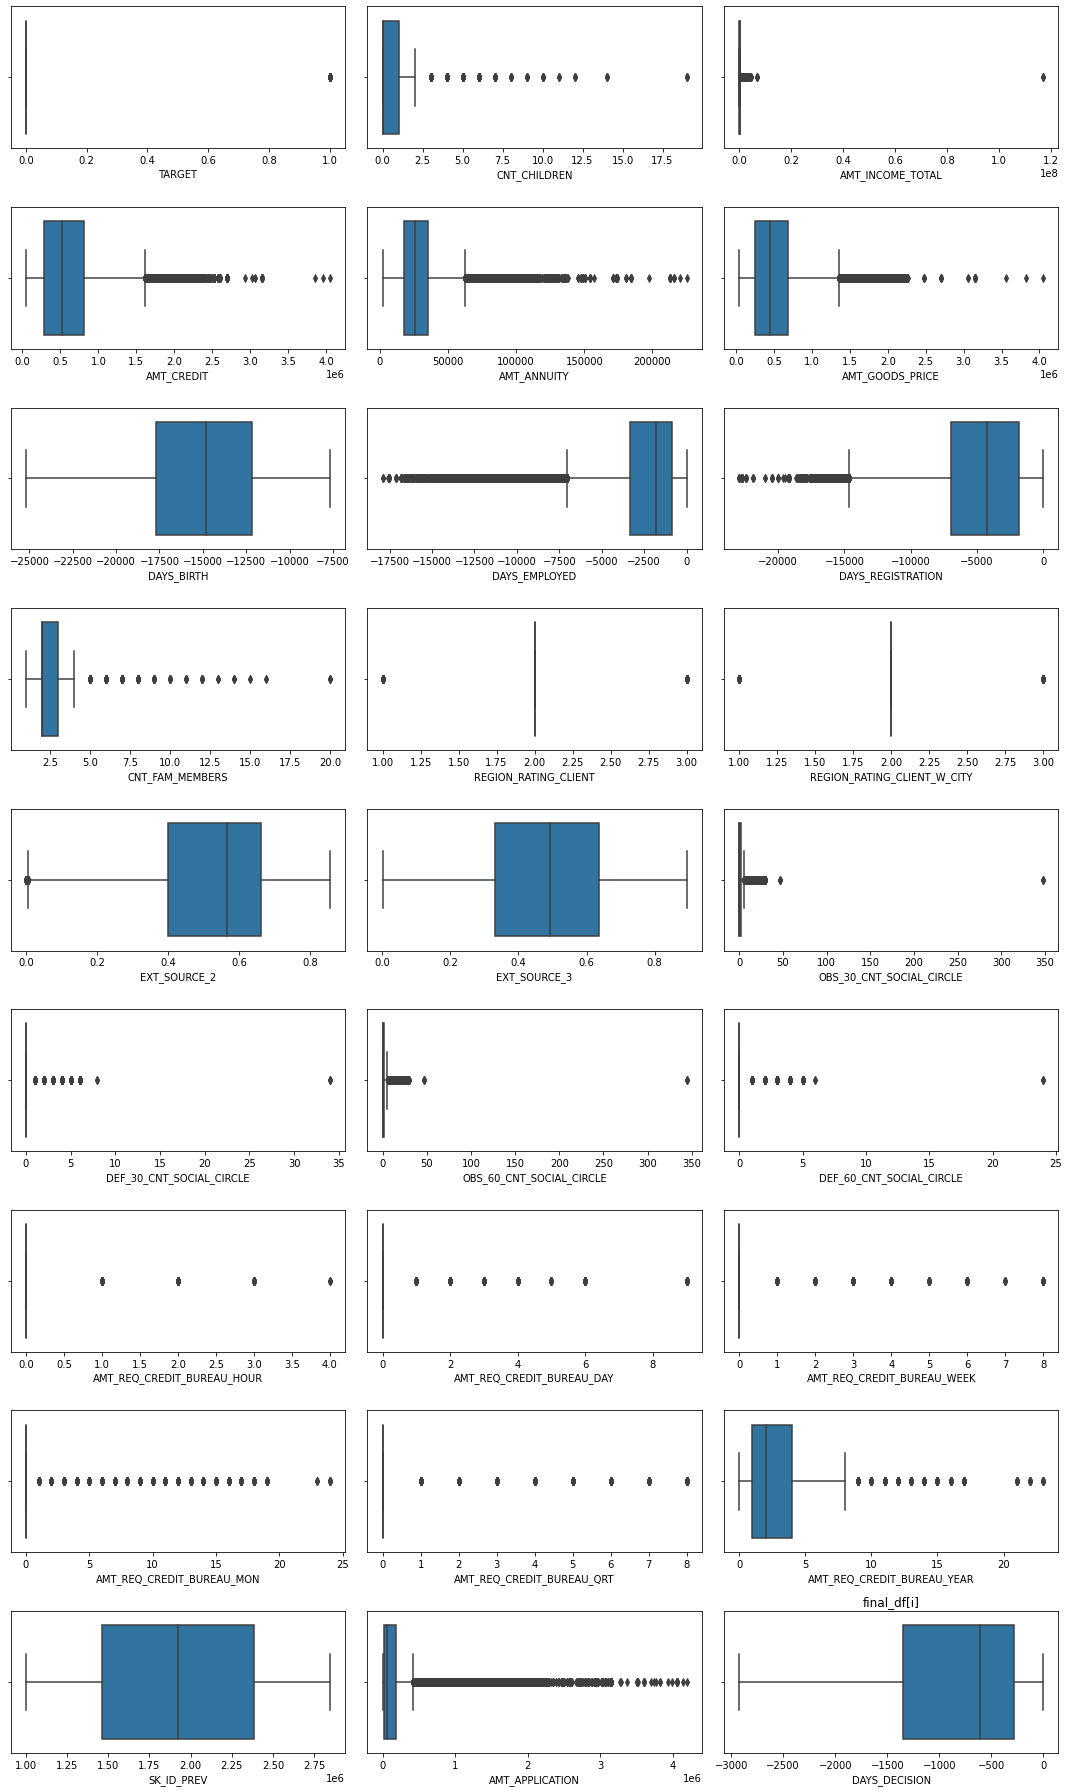

In [134]:
fig, ax= plt.subplots(nrows= 9,ncols = 3, figsize=(15,25))

for i, subplot in zip(final_df.select_dtypes(include = np.number), ax.flatten()):
    sns.boxplot(final_df[i], ax=subplot)
    plt.title('final_df[i]')

plt.tight_layout()
plt.show()

In [109]:
from scipy.stats import jarque_bera

for column in final_df.select_dtypes(include=np.number):
    print(f"Jarque-Bera test for column: {column}")
    print("-------------------------------")
    
    jb_stat, jb_p = jarque_bera(final_df[column])
    print(f"Jarque-Bera test statistic: {jb_stat:.4f}")
    print(f"Jarque-Bera test p-value: ",jb_p)
    
    if jb_p < 0.05:
        print("Data is not normally distributed.")
    else:
        print("Data is normally distributed.")
    
    print("-------------------------------\n")

Jarque-Bera test for column: TARGET
-------------------------------
Jarque-Bera test statistic: 2186047.0517
Jarque-Bera test p-value:  0.0
Data is not normally distributed.
-------------------------------

Jarque-Bera test for column: CNT_CHILDREN
-------------------------------
Jarque-Bera test statistic: 1099182.7345
Jarque-Bera test p-value:  0.0
Data is not normally distributed.
-------------------------------

Jarque-Bera test for column: AMT_INCOME_TOTAL
-------------------------------
Jarque-Bera test statistic: 1139480753521378.7500
Jarque-Bera test p-value:  0.0
Data is not normally distributed.
-------------------------------

Jarque-Bera test for column: AMT_CREDIT
-------------------------------
Jarque-Bera test statistic: 199954.5307
Jarque-Bera test p-value:  0.0
Data is not normally distributed.
-------------------------------

Jarque-Bera test for column: AMT_ANNUITY
-------------------------------
Jarque-Bera test statistic: 679979.7732
Jarque-Bera test p-value:  0.0


In [110]:
from scipy.stats import mannwhitneyu

non_parametric_columns = final_df.select_dtypes(include=np.number).columns

for column in non_parametric_columns:
    print(f"Mann-Whitney U test for column: {column}")
    print("-------------------------------")
    
    group1 = final_df[final_df['TARGET'] == 0][column]
    group2 = final_df[final_df['TARGET'] == 1][column]
    
    if len(group1) == 0 or len(group2) == 0:
        print("Not enough data points in one of the groups.")
    else:
        stat, p_value = mannwhitneyu(group1, group2)
        print(f"Mann-Whitney U test statistic: {stat:.4f}")
        print(f"Mann-Whitney U test p-value: ",p_value)
        
        if p_value < 0.05:
            print("There is a significant association between the variables.")
        else:
            print("There is no significant association between the variables.")
    
print("-------------------------------\n")

Mann-Whitney U test for column: TARGET
-------------------------------
Mann-Whitney U test statistic: 0.0000
Mann-Whitney U test p-value:  0.0
There is a significant association between the variables.
Mann-Whitney U test for column: CNT_CHILDREN
-------------------------------
Mann-Whitney U test statistic: 25639520504.5000
Mann-Whitney U test p-value:  3.796016008100402e-18
There is a significant association between the variables.
Mann-Whitney U test for column: AMT_INCOME_TOTAL
-------------------------------
Mann-Whitney U test statistic: 27087796116.0000
Mann-Whitney U test p-value:  7.156118085059645e-68
There is a significant association between the variables.
Mann-Whitney U test for column: AMT_CREDIT
-------------------------------
Mann-Whitney U test statistic: 27350116559.5000
Mann-Whitney U test p-value:  7.997338765251749e-106
There is a significant association between the variables.
Mann-Whitney U test for column: AMT_ANNUITY
-------------------------------
Mann-Whitney U 

In [108]:
from scipy.stats import chi2_contingency

categorical_columns = final_df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Chi-Square test for column: {column}")
    print("-------------------------------")
    
    contingency_table = pd.crosstab(final_df[column], final_df['TARGET'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square test statistic: {chi2_stat:.4f}")
    print(f"P-value: ", p_value)
    
    if p_value < 0.05:
        print("There is a significant association between the variables.")
    else:
        print("There is no significant association between the variables.")
    
    print("-------------------------------\n")

Chi-Square test for column: NAME_CONTRACT_TYPE_x
-------------------------------
Chi-Square test statistic: 1137.7672
P-value:  2.044219615351489e-249
There is a significant association between the variables.
-------------------------------

Chi-Square test for column: FLAG_OWN_REALTY
-------------------------------
Chi-Square test statistic: 9.2581
P-value:  0.002344510083239603
There is a significant association between the variables.
-------------------------------

Chi-Square test for column: NAME_TYPE_SUITE
-------------------------------
Chi-Square test statistic: 78.5374
P-value:  7.161168673830531e-15
There is a significant association between the variables.
-------------------------------

Chi-Square test for column: NAME_INCOME_TYPE
-------------------------------
Chi-Square test statistic: 1623.9571
P-value:  0.0
There is a significant association between the variables.
-------------------------------

Chi-Square test for column: NAME_EDUCATION_TYPE
-------------------------

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
df_final = pd.DataFrame()

In [22]:
for column in final_df.select_dtypes(include = 'object').columns:
    df_final[column] = le.fit_transform(final_df[column])

In [23]:
from sklearn.preprocessing import PowerTransformer
numerical_cols = final_df.drop('TARGET',axis=1).select_dtypes(include=np.number).columns

transformer = PowerTransformer(method='yeo-johnson')

df_final[numerical_cols] = transformer.fit_transform(final_df[numerical_cols])
df_final.head()

,NAME_CONTRACT_TYPE_x,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,DAYS_DECISION
0,0,1,6,4,4,3,1,8,5,1,...,3.206381,-0.077375,-0.075443,-0.193948,-0.491959,-0.55371,-0.817368,-1.731455,0.618112,0.064558
1,1,1,6,4,4,3,1,8,11,1,...,-0.311889,-0.077375,-0.075443,-0.193948,-0.491959,-0.55371,-1.714667,-0.648808,-0.192506,-0.232441
2,0,1,5,2,4,1,1,8,33,1,...,-0.311889,-0.077375,-0.075443,-0.193948,-0.491959,1.76510,-0.817368,0.576605,0.571210,0.510363
3,0,1,5,2,4,1,1,8,33,0,...,-0.311889,-0.077375,-0.075443,-0.193948,-0.491959,1.76510,-0.817368,-0.274846,-1.638360,1.560591
4,0,1,5,2,4,1,1,8,33,1,...,-0.311889,-0.077375,-0.075443,-0.193948,-0.491959,1.76510,-0.817368,-1.414435,0.020020,-1.610898


In [24]:
df_final['TARGET'] = final_df['TARGET']

In [25]:
df_final.shape

(788066, 49)

In [26]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [27]:
def per_measures(model,test,pred):


    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    #aic         =model.aic
    reliability = cohen_kappa_score(test,pred)



    return (accuracy,recall,precision,f1score,reliability)

In [28]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score", 'Cohen-Kappa'] )

In [29]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3],
                                    #'AIC'         : per_measures(model,ytest,ypred)[4],
                                    'Cohen-Kappa' : per_measures(model,test,pred)[4]},
                                   ignore_index = True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = df_final.drop('TARGET',axis = 1)
y = df_final['TARGET']

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.7, random_state=420, stratify = y)

In [33]:
import statsmodels.api as sm

In [34]:
xtrain_reset = xtrain.reset_index(drop=True)
y_reset = ytrain.reset_index(drop=True)

In [35]:
xtrain_const = sm.add_constant(xtrain_reset)

model = sm.Logit(y_reset, xtrain_const).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.275818
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               551646
Model:                          Logit   Df Residuals:                   551597
Method:                           MLE   Df Model:                           48
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.1054
Time:                        18:13:56   Log-Likelihood:            -1.5215e+05
converged:                       True   LL-Null:                   -1.7009e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.6543      0.102    -26.076      0.000      -2.854      -2.455
NAME_CONTRACT_TYPE_x           -0.2858      0.024    -11.779      0.000      -0.333      -0.238
FLAG_OWN_REALTY                 0.0249      0.011      2.260      0.024       0.003       0.047
NAME_TYPE_SUITE                 0.0090      0.003      3.116      0.002       0.003       0.015
NAME_INCOME_TYPE                0.0420      0.003     14.528      0.000       0.036       0.048
NAME_EDUCATION_TYPE             0.1493      0.004     34.434      0.000       0.141       0.158
NAME_FAMILY_STATUS             -0.0787      0.009     -8.386      0.000      -0.097      -0.060
NAME_HOUSING_TYPE               0.0313      0.005      6.684      0.000       0.022       0.040
OCCUPATION_TYPE                 0.0082      0.001      7.337      0.000       0.006       0.010
ORGANIZATION_TYPE              -0.0006      0.000     -2.245      0.025      -0.001   -7.84e-05
NAME_CONTRACT_TYPE_y           -0.0497      0.012     -4.128      0.000      -0.073      -0.026
FLAG_LAST_APPL_PER_CONTRACT     0.1145      0.063      1.827      0.068      -0.008       0.237
NAME_CASH_LOAN_PURPOSE         -0.0110      0.002     -5.029      0.000      -0.015      -0.007
NAME_CONTRACT_STATUS           -0.0042      0.017     -0.242      0.809      -0.038       0.030
NAME_PAYMENT_TYPE               0.0088      0.005      1.685      0.092      -0.001       0.019
CODE_REJECT_REASON             -0.0282      0.006     -4.600      0.000      -0.040      -0.016
NAME_CLIENT_TYPE               -0.1007      0.007    -13.885      0.000      -0.115      -0.086
NAME_GOODS_CATEGORY             0.0026      0.001      2.486      0.013       0.001       0.005
NAME_PORTFOLIO                 -0.0394      0.011     -3.599      0.000      -0.061      -0.018
NAME_PRODUCT_TYPE              -0.0239      0.015     -1.563      0.118      -0.054       0.006
CHANNEL_TYPE                   -0.0185      0.004     -5.218      0.000      -0.026      -0.012
NAME_SELLER_INDUSTRY            0.0172      0.002      7.134      0.000       0.012       0.022
NAME_YIELD_GROUP               -0.0259      0.005     -5.555      0.000      -0.035      -0.017
CNT_CHILDREN                    0.0767      0.012      6.601      0.000       0.054       0.099
AMT_INCOME_TOTAL               -0.0042      0.006     -0.725      0.468      -0.016       0.007
AMT_CREDIT                      0.9937      0.032     31.264      0.000       0.931       1.056
AMT_ANNUITY                     0.1648      0.009     17.519      0.000       0.146       0.183
AMT_GOODS_PRICE                -1.0860      0.032    -33.434      0.000      -1.150      -1.022
DAYS_BIRTH                      0.0370      0.006      6.617      0.000       0.026       0.048
DAYS_EMPLOYED                   0.1627      0.005     31.007      0.000       0.152       0.173
DAYS_REGISTRATION               0.0249      0.005      4.897      0.000  

In [124]:
xtrain_const.columns[model.pvalues < 0.05]

Index(['const', 'NAME_CONTRACT_TYPE_x', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_DECISION'],
      dtype='object')

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000, random_state = 420)
lr_model = lr.fit(xtrain,ytrain)
ypred_LR = lr_model.predict(xtest)
print(classification_report(ytest, ypred_LR))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    214546
           1       0.55      0.01      0.01     21874

    accuracy                           0.91    236420
   macro avg       0.73      0.50      0.48    236420
weighted avg       0.87      0.91      0.86    236420



In [120]:
ytrain_LR = lr_model.predict(xtrain)
print(classification_report(ytest, ypred_LR))
print(classification_report(ytrain, ytrain_LR))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    214546
           1       0.55      0.01      0.01     21874

    accuracy                           0.91    236420
   macro avg       0.73      0.50      0.48    236420
weighted avg       0.87      0.91      0.86    236420

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    500608
           1       0.57      0.01      0.01     51038

    accuracy                           0.91    551646
   macro avg       0.74      0.50      0.48    551646
weighted avg       0.88      0.91      0.86    551646



In [130]:
roc_auc_score(ytest, ypred_LR)

0.5027609255095263

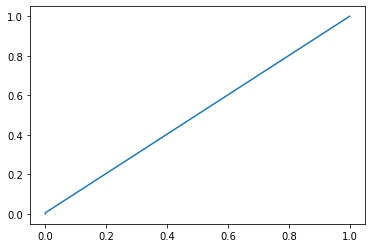

In [131]:
fpr, tpr, thresh = roc_curve(ytest, ypred_LR)
plt.plot(fpr,tpr)

In [121]:
confusion_matrix(ytest, ypred_LR)

array([[214436,    110],
       [ 21742,    132]], dtype=int64)

In [122]:
confusion_matrix(ytrain, ytrain_LR)

array([[500398,    210],
       [ 50758,    280]], dtype=int64)

In [37]:
update_performance('Logistic Regression', lr, ytest, ypred_LR)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932


In [38]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB_model = GNB.fit(xtrain,ytrain)
ypred_GNB = GNB_model.predict(xtest)
print(classification_report(ytest, ypred_GNB))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91    214546
           1       0.21      0.24      0.22     21874

    accuracy                           0.84    236420
   macro avg       0.56      0.57      0.57    236420
weighted avg       0.85      0.84      0.85    236420



In [39]:
update_performance('GaussianNB', GNB_model, ytest, ypred_GNB)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531


In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(xtrain, ytrain)
ypred_rf = rf_model.predict(xtest)
ytrain_rf = rf_model.predict(xtrain)
print(classification_report(ytest, ypred_rf))
print(classification_report(ytrain, ytrain_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    214546
           1       1.00      0.63      0.77     21874

    accuracy                           0.97    236420
   macro avg       0.98      0.82      0.88    236420
weighted avg       0.97      0.97      0.96    236420

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500608
           1       1.00      1.00      1.00     51038

    accuracy                           1.00    551646
   macro avg       1.00      1.00      1.00    551646
weighted avg       1.00      1.00      1.00    551646



In [41]:
update_performance('RandomForest', rf, ytest, ypred_rf)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643


In [42]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_model= DT.fit(xtrain, ytrain)
ypred_DT = DT_model.predict(xtest)

In [43]:
ytrain_dt = DT_model.predict(xtrain)

In [44]:
print(classification_report(ytrain, ytrain_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500608
           1       1.00      1.00      1.00     51038

    accuracy                           1.00    551646
   macro avg       1.00      1.00      1.00    551646
weighted avg       1.00      1.00      1.00    551646



In [45]:
cohen_kappa_score(ytrain, ytrain_dt)

1.0

In [46]:
update_performance('Decision Tree', DT_model, ytest, ypred_DT)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968


In [47]:
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix

In [48]:
confusion_matrix(ytrain, ytrain_dt)

array([[500608,      0],
       [     0,  51038]], dtype=int64)

In [49]:
confusion_matrix(ytest, ypred_DT)

array([[212360,   2186],
       [  1963,  19911]], dtype=int64)

In [50]:
cohen_kappa_score(ytest, ypred_DT)

0.8959683467025884

In [51]:
print(classification_report(ytest, ypred_DT))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214546
           1       0.90      0.91      0.91     21874

    accuracy                           0.98    236420
   macro avg       0.95      0.95      0.95    236420
weighted avg       0.98      0.98      0.98    236420



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

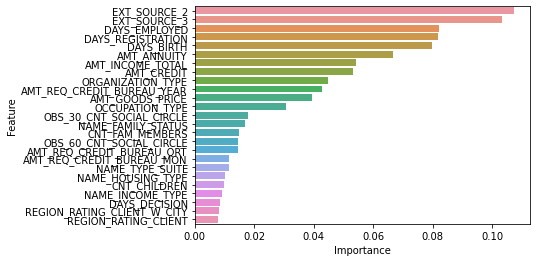

In [52]:
feature_imp = pd.DataFrame({'Feature': xtrain.columns, 'Importance': DT_model.feature_importances_}).sort_values('Importance', ascending=False).head(25)
sns.barplot(x='Importance',y = 'Feature',data = feature_imp)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier(criterion='entropy')


In [53]:
dt_gscv = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=2, criterion='entropy')

In [54]:
dt_model = dt_gscv.fit(xtrain,ytrain)
ypred_dtgscv = dt_model.predict(xtest)
print(classification_report(ytest, ypred_dtgscv))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214546
           1       0.92      0.92      0.92     21874

    accuracy                           0.99    236420
   macro avg       0.96      0.96      0.96    236420
weighted avg       0.99      0.99      0.99    236420



In [55]:
ytrain_dtgscv = dt_model.predict(xtrain)
print(classification_report(ytrain, ytrain_dtgscv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500608
           1       1.00      1.00      1.00     51038

    accuracy                           1.00    551646
   macro avg       1.00      1.00      1.00    551646
weighted avg       1.00      1.00      1.00    551646



In [56]:
confusion_matrix(ytest, ypred_dtgscv)

array([[212769,   1777],
       [  1684,  20190]], dtype=int64)

In [57]:
confusion_matrix(ytrain, ytrain_dtgscv)

array([[500608,      0],
       [     0,  51038]], dtype=int64)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

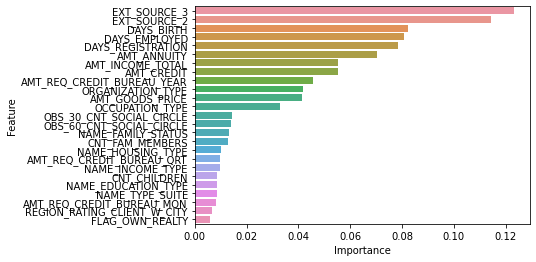

In [58]:
feature_imp = pd.DataFrame({'Feature': xtrain.columns, 'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False).head(25)
sns.barplot(x='Importance',y = 'Feature',data = feature_imp)

In [59]:
update_performance('DT GridSearchCV', dt_model, ytest, ypred_dtgscv)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988


In [60]:
new_x = x[['NAME_CONTRACT_TYPE_x', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_DECISION']]

In [61]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(new_x, y, train_size = 0.7, stratify = y, random_state = 420)

In [62]:
dt_impf = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=2, criterion='entropy')
dt_impfmodel = dt_impf.fit(Xtrain,Ytrain)
ypred_dtimpf = dt_impfmodel.predict(Xtest)
ytrain_dtimpf = dt_impfmodel.predict(Xtrain)
print(classification_report(Ytest, ypred_dtimpf))
print(classification_report(Ytrain, ytrain_dtimpf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214546
           1       0.92      0.92      0.92     21874

    accuracy                           0.99    236420
   macro avg       0.96      0.96      0.96    236420
weighted avg       0.99      0.99      0.99    236420

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500608
           1       1.00      1.00      1.00     51038

    accuracy                           1.00    551646
   macro avg       1.00      1.00      1.00    551646
weighted avg       1.00      1.00      1.00    551646



In [63]:
update_performance('DT-ImportantFeature', dt_impfmodel, Ytest, ypred_dtimpf)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617


In [64]:
abcl = AdaBoostClassifier(dt_impf, random_state=420)
abcl_model = abcl.fit(Xtrain, Ytrain)
ypred_abcl = abcl_model.predict(Xtest)
ytrain_abcl = abcl_model.predict(Xtrain)
print(classification_report(Ytest, ypred_abcl))
print(classification_report(Ytrain, ytrain_abcl))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214546
           1       0.92      0.92      0.92     21874

    accuracy                           0.99    236420
   macro avg       0.96      0.96      0.96    236420
weighted avg       0.99      0.99      0.99    236420

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500608
           1       1.00      1.00      1.00     51038

    accuracy                           1.00    551646
   macro avg       1.00      1.00      1.00    551646
weighted avg       1.00      1.00      1.00    551646



In [65]:
update_performance('AdaBoost-DT ImpF', abcl, ytest, ypred_abcl)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617
6,AdaBoost-DT ImpF,0.985395,0.922191,0.920130,0.921159,0.913111


In [66]:
from imblearn.over_sampling import SMOTE
desired_class_dist = {0: 715154, 1: 270000}

smote = SMOTE(sampling_strategy=desired_class_dist, random_state=42)
X_resampled, y_resampled = smote.fit_resample(new_x, y)

In [67]:
y_resampled.value_counts()/len(y_resampled) * 100 

0    72.593117
1    27.406883
Name: TARGET, dtype: float64

In [83]:
y_resampled.shape, X_resampled.shape

((985154,), (985154, 36))

In [84]:
XTrain, XTest, YTrain, YTest = train_test_split(X_resampled, y_resampled, train_size=0.7,  random_state=420)

In [86]:
rf_sm = RandomForestClassifier()
rf_smodel = rf_sm.fit(XTrain, YTrain)
ypred_srf = rf_smodel.predict(XTest)
ytrain_srf = rf_smodel.predict(XTrain)
print(classification_report(YTest, ypred_srf))
print(classification_report(YTrain, ytrain_srf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    214318
           1       0.99      0.89      0.94     81229

    accuracy                           0.97    295547
   macro avg       0.98      0.95      0.96    295547
weighted avg       0.97      0.97      0.97    295547

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500836
           1       1.00      1.00      1.00    188771

    accuracy                           1.00    689607
   macro avg       1.00      1.00      1.00    689607
weighted avg       1.00      1.00      1.00    689607



In [97]:
update_performance('RF-SMOTE', rf_sm, YTest, ypred_srf)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617
6,AdaBoost-DT ImpF,0.985395,0.922191,0.920130,0.921159,0.913111
7,RF-SMOTE,0.969213,0.894385,0.992893,0.941068,0.920309


In [87]:
dt_smbp = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=2, criterion='entropy')
dt_smodel = dt_smbp.fit(XTrain,YTrain)
ypred_smdt = dt_smodel.predict(XTest)
ytrain_smdt = dt_smodel.predict(XTrain)
print(classification_report(YTest, ypred_smdt))
print(classification_report(YTrain, ytrain_smdt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    214318
           1       0.91      0.87      0.89     81229

    accuracy                           0.94    295547
   macro avg       0.93      0.92      0.92    295547
weighted avg       0.94      0.94      0.94    295547

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500836
           1       1.00      1.00      1.00    188771

    accuracy                           1.00    689607
   macro avg       1.00      1.00      1.00    689607
weighted avg       1.00      1.00      1.00    689607



In [98]:
update_performance('DT-SMOTE', dt_smbp, YTest, ypred_smdt)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617
6,AdaBoost-DT ImpF,0.985395,0.922191,0.920130,0.921159,0.913111
7,RF-SMOTE,0.969213,0.894385,0.992893,0.941068,0.920309
8,DT-SMOTE,0.939911,0.871893,0.905943,0.888592,0.847474


In [88]:
abcl_sm = AdaBoostClassifier(dt_smbp, random_state=420)
abcl_smodel = abcl_sm.fit(XTrain, YTrain)
ypred_abclsm = abcl_smodel.predict(XTest)
ytrain_abclsm = abcl_smodel.predict(XTrain)
print(classification_report(YTest, ypred_abclsm))
print(classification_report(YTrain, ytrain_abclsm))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    214318
           1       0.91      0.87      0.89     81229

    accuracy                           0.94    295547
   macro avg       0.93      0.92      0.92    295547
weighted avg       0.94      0.94      0.94    295547

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500836
           1       1.00      1.00      1.00    188771

    accuracy                           1.00    689607
   macro avg       1.00      1.00      1.00    689607
weighted avg       1.00      1.00      1.00    689607



In [99]:
update_performance('AdaBoost-DT-SMOTE', abcl_sm, YTest, ypred_abclsm)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617
6,AdaBoost-DT ImpF,0.985395,0.922191,0.920130,0.921159,0.913111
7,RF-SMOTE,0.969213,0.894385,0.992893,0.941068,0.920309
8,DT-SMOTE,0.939911,0.871893,0.905943,0.888592,0.847474
9,AdaBoost-DT-SMOTE,0.940077,0.872656,0.905867,0.888952,0.847939


In [100]:
confusion_matrix(YTest, ypred_abclsm)

array([[206952,   7366],
       [ 10344,  70885]], dtype=int64)

In [101]:
confusion_matrix(YTrain, ytrain_abclsm)

array([[500836,      0],
       [     0, 188771]], dtype=int64)

In [102]:
abcl_sm = AdaBoostClassifier(rf_sm, random_state=420)
abcl_smodel = abcl_sm.fit(XTrain, YTrain)
ypred_abclsm = abcl_smodel.predict(XTest)
ytrain_abclsm = abcl_smodel.predict(XTrain)
print(classification_report(YTest, ypred_abclsm))
print(classification_report(YTrain, ytrain_abclsm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    214318
           1       0.99      0.90      0.94     81229

    accuracy                           0.97    295547
   macro avg       0.98      0.95      0.96    295547
weighted avg       0.97      0.97      0.97    295547

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500836
           1       1.00      1.00      1.00    188771

    accuracy                           1.00    689607
   macro avg       1.00      1.00      1.00    689607
weighted avg       1.00      1.00      1.00    689607



In [103]:
update_performance('AdaBoost-RF-SMOTE', abcl_sm, YTest, ypred_abclsm)
perf_score

C:\Users\nivvi\AppData\Local\Temp\ipykernel_21404\3232402046.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa
0,Logistic Regression,0.907571,0.006035,0.545455,0.011937,0.009932
1,GaussianNB,0.844874,0.235348,0.205124,0.219199,0.133531
2,RandomForest,0.965777,0.630246,0.999782,0.773126,0.755643
3,Decision Tree,0.982451,0.910259,0.901073,0.905642,0.895968
4,DT GridSearchCV,0.985361,0.923014,0.919106,0.921056,0.912988
5,DT-ImportantFeature,0.985314,0.921551,0.919869,0.920709,0.912617
6,AdaBoost-DT ImpF,0.985395,0.922191,0.920130,0.921159,0.913111
7,RF-SMOTE,0.969213,0.894385,0.992893,0.941068,0.920309
8,DT-SMOTE,0.939911,0.871893,0.905943,0.888592,0.847474
9,AdaBoost-DT-SMOTE,0.940077,0.872656,0.905867,0.888952,0.847939


In [111]:
confusion_matrix(YTest, ypred_abclsm)

array([[213784,    534],
       [  8509,  72720]], dtype=int64)

In [112]:
confusion_matrix(YTrain, ytrain_abclsm)

array([[500836,      0],
       [     0, 188771]], dtype=int64)

In [123]:
perf_score.iloc[0]

Model          Logistic Regression
Accuracy                  0.907571
Recall                    0.006035
Precision                 0.545455
F1 Score                  0.011937
Cohen-Kappa               0.009932
Name: 0, dtype: object

In [124]:
perf_score.iloc[-1]

Model          AdaBoost-RF-SMOTE
Accuracy                0.969402
Recall                  0.895247
Precision                0.99271
F1 Score                0.941463
Cohen-Kappa             0.920826
Name: 10, dtype: object

In [125]:
from sklearn.metrics import roc_auc_score, roc_curve

In [126]:
roc_auc_score(YTest, ypred_abclsm)

0.9463775734390073

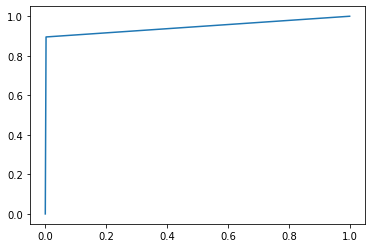

In [128]:
fpr, tpr, thresh = roc_curve(YTest, ypred_abclsm)
plt.plot(fpr,tpr)